In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
nyc_tree = pd.read_csv('data/nyc_tree_eda.csv')

In [3]:
nyc_tree.sample(7)

,health,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
230245,Good,422314,210906,11/03/2015,32,0,OnCurb,Alive,Platanus x acerifolia,London planetree,...,3092000,New York,40.659492,-73.902227,1.011377e+06,179562.1800,42.0,920.0,3320032.0,3.038470e+09
560834,Fair,57671,405393,07/09/2015,14,0,OnCurb,Alive,Fraxinus pennsylvanica,green ash,...,5012804,New York,40.560784,-74.103389,9.555225e+05,143602.3333,50.0,12804.0,5057108.0,5.040930e+09
102806,Good,297476,103065,10/08/2015,10,0,OnCurb,Alive,Tilia cordata,littleleaf linden,...,1003800,New York,40.725680,-73.988371,9.874734e+05,203661.5993,2.0,38.0,1006171.0,1.004450e+09
321802,Good,516432,213867,12/14/2015,22,0,OnCurb,Alive,Platanus x acerifolia,London planetree,...,3072000,New York,40.628686,-73.922199,1.005846e+06,168333.4088,46.0,720.0,3336787.0,3.077810e+09
301213,Fair,524313,412216,12/17/2015,5,0,OnCurb,Alive,Acer rubrum,red maple,...,5020803,New York,40.529120,-74.208490,9.262916e+05,132118.3995,51.0,20803.0,5085236.0,5.069460e+09
425911,Good,622000,203365,07/11/2016,4,0,OnCurb,Alive,Pyrus calleryana,Callery pear,...,3015200,New York,40.617057,-74.022391,9.780337e+05,164087.6033,43.0,152.0,3154380.0,3.060720e+09
519096,Good,11060,217449,06/05/2015,5,0,OnCurb,Alive,Pyrus calleryana,Callery pear,...,3048500,New York,40.709966,-73.937961,1.001450e+06,197942.2049,34.0,485.0,3070891.0,3.030370e+09


In [4]:
#nyc_tree.health = nyc_tree.health.apply(lambda x: 'Good' if x==2 else ('Fair' if x==1 else 'Poor'))

In [5]:
nyc_tree.health.isna().sum()

31616

In [6]:
nyc_tree.status.value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [7]:
17654 + 13961

31615

<AxesSubplot:xlabel='tree_dbh', ylabel='health'>

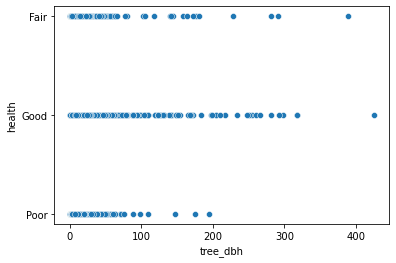

In [8]:
sns.scatterplot(x=nyc_tree.tree_dbh, y=nyc_tree.health)

In [9]:
## Isolate columns with yes or no values
yes_no_test = nyc_tree[['health', 'root_stone', 'root_grate', 'root_other',
                        'trunk_wire', 'trnk_light',  'trnk_other',
                        'brch_light', 'brch_shoe', 'brch_other']]

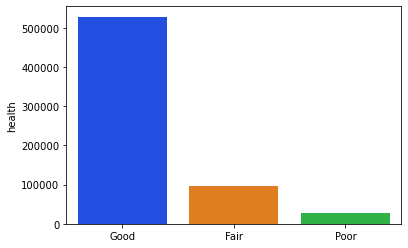

In [10]:
sns.barplot(x=nyc_tree.health.value_counts().index, y=nyc_tree.health.value_counts(), palette='bright');

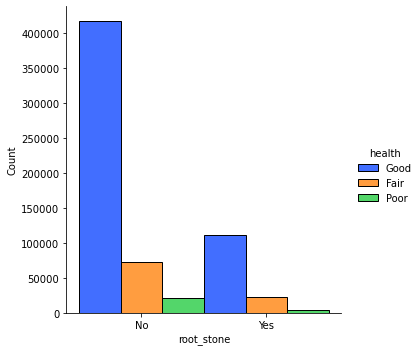

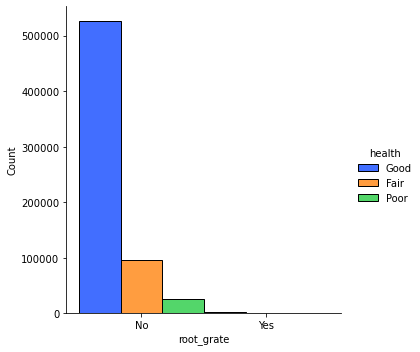

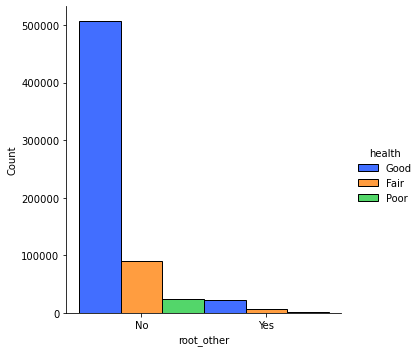

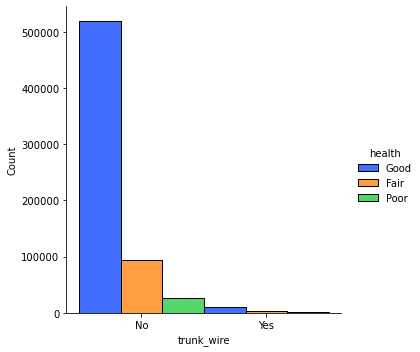

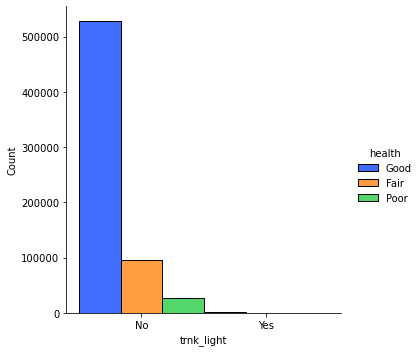

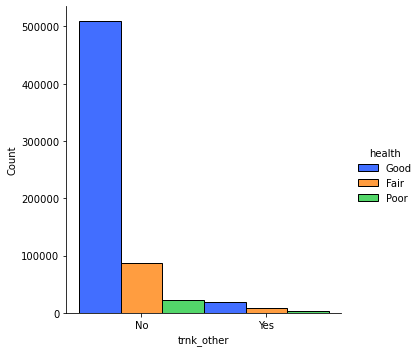

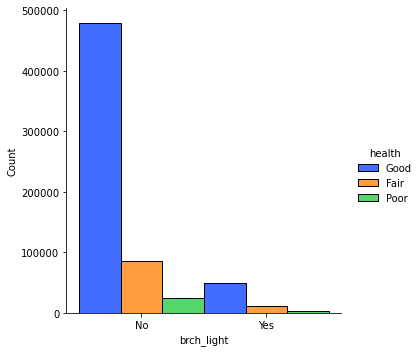

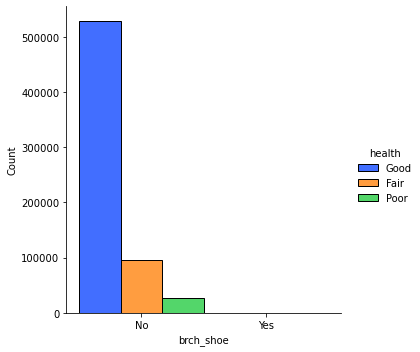

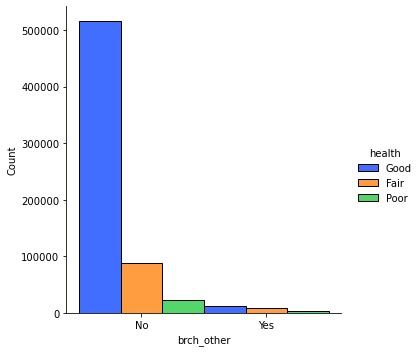

In [11]:
for column in yes_no_test.drop('health', axis=1).columns:
    sns.displot(yes_no_test, x=column, hue='health', multiple='dodge',
                hue_order=['Good', 'Fair', 'Poor'], palette='bright')

In [12]:
nyc_tree.steward.value_counts(dropna=False)

None       487823
1or2       143557
NaN         31615
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [13]:
nyc_tree.steward.unique()

array(['None', '1or2', '3or4', nan, '4orMore'], dtype=object)

In [14]:
type(nyc_tree.steward.unique())

numpy.ndarray

In [15]:
for each in nyc_tree.steward.unique():
    print(each)

None
1or2
3or4
nan
4orMore


In [16]:
nyc_tree.steward.dropna().unique()

array(['None', '1or2', '3or4', '4orMore'], dtype=object)

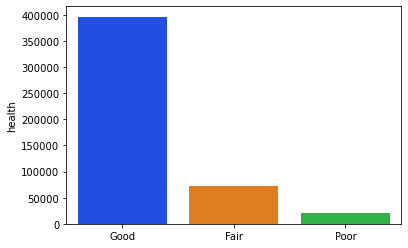

In [17]:
for value in nyc_tree.steward.dropna().unique():
    sns.barplot(x=nyc_tree.loc[nyc_tree.steward == value].health.value_counts().index,
                y=nyc_tree.loc[nyc_tree.steward == value].health.value_counts(), palette='bright')

<AxesSubplot:ylabel='health'>

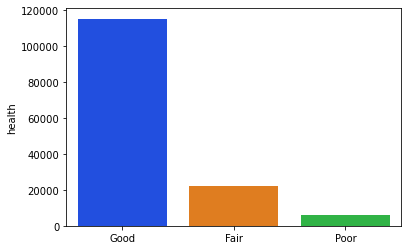

In [20]:
sns.barplot(x=nyc_tree.loc[nyc_tree.steward == '1or2'].health.value_counts().index,
            y=nyc_tree.loc[nyc_tree.steward == '1or2'].health.value_counts(), palette='bright')

<AxesSubplot:ylabel='health'>

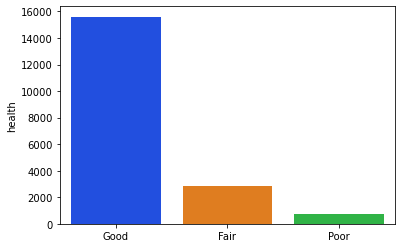

In [21]:
sns.barplot(x=nyc_tree.loc[nyc_tree.steward == '3or4'].health.value_counts().index,
            y=nyc_tree.loc[nyc_tree.steward == '3or4'].health.value_counts(), palette='bright')

<AxesSubplot:ylabel='health'>

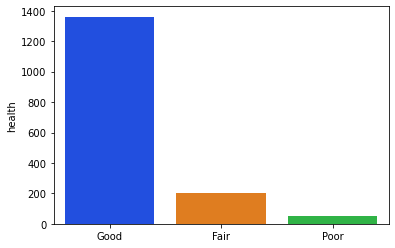

In [22]:
sns.barplot(x=nyc_tree.loc[nyc_tree.steward == '4orMore'].health.value_counts().index,
            y=nyc_tree.loc[nyc_tree.steward == '4orMore'].health.value_counts(), palette='bright')